<a href="https://colab.research.google.com/github/tusharkanta/ML_DL/blob/master/EIP4Session1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import keras

In [0]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Add, Activation, Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist

(60000, 28, 28)


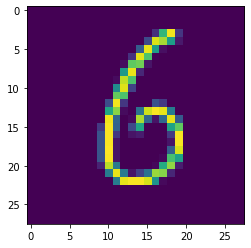

In [41]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
#print(Y_train)
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[18])


In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype ('float32')
X_test = X_test.astype ('float32')
X_train /= 255
X_test /= 255

In [44]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
#print(Y_train)
#print(Y_test)

In [46]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [47]:
from keras.layers import Activation
model = Sequential()

model = Sequential()
model.add(Convolution2D(8, (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(8, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Convolution2D(8, (3, 3), activation='relu'))
model.add(Convolution2D(16, (3, 3), activation='relu'))
model.add(Convolution2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Convolution2D(10, (3, 3)))
model.add(Flatten())
model.add(Activation('softmax'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 26, 26, 8)         80        
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 24, 24, 8)         584       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 12, 12, 8)         0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 10, 10, 8)         584       
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 8, 8, 16)          1168      
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 6, 6, 32)          4640      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 3, 3, 32)         

In [48]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 26, 26, 8)         80        
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 24, 24, 8)         584       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 12, 12, 8)         0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 10, 10, 8)         584       
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 8, 8, 16)          1168      
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 6, 6, 32)          4640      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 3, 3, 32)         

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['categorical_accuracy'])

In [50]:
from sklearn.model_selection import StratifiedKFold

# cross validation and dropouts are ways to address overfitting. 
# here we are taking cross validation route to addess this
kfold = StratifiedKFold(n_splits=6, shuffle=True, random_state=7)
cvscores = []
(X, Y) = (X_train, y_train)
for trainIDX, testIDX in kfold.split(X, Y):
    # Fit the model
    model.fit(X[trainIDX], Y_train[trainIDX], epochs=15, batch_size=96, verbose=1, validation_data=(X_test, Y_test))
    # Evaluate the model
    scores = model.evaluate(X[testIDX], Y_train[testIDX], verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)

Train on 49995 samples, validate on 10000 samples
Epoch 1/15
49995/49995 [==============================] - 34s 678us/step - loss: 0.3806 - categorical_accuracy: 0.8853 - val_loss: 0.1131 - val_categorical_accuracy: 0.9659
Epoch 2/15
49995/49995 [==============================] - 33s 661us/step - loss: 0.1070 - categorical_accuracy: 0.9672 - val_loss: 0.0663 - val_categorical_accuracy: 0.9797
Epoch 3/15
49995/49995 [==============================] - 33s 666us/step - loss: 0.0771 - categorical_accuracy: 0.9756 - val_loss: 0.0708 - val_categorical_accuracy: 0.9779
Epoch 4/15
49995/49995 [==============================] - 33s 667us/step - loss: 0.0620 - categorical_accuracy: 0.9806 - val_loss: 0.0495 - val_categorical_accuracy: 0.9834
Epoch 5/15
49995/49995 [==============================] - 33s 666us/step - loss: 0.0534 - categorical_accuracy: 0.9834 - val_loss: 0.0452 - val_categorical_accuracy: 0.9849
Epoch 6/15
49995/49995 [==============================] - 33s 657us/step - loss: 0.04

In [0]:
cvscores
score = model.evaluate(X_test, Y_test, verbose=0)

In [52]:
print(score)

[0.07118246783003451, 0.9907]


In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])


In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[3]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_1'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()